Exercise Sheet 8 **Reinforcement Learning I**

__Adu Matory__ and __Lukas Braun__, December 6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Exercise 1: The 10-armed bandit**

In [ ]:
# 1.1
np.random.seed(1234)
ls = 10 # levers
p = np.random.uniform(0,.9,ls).astype('float64')

In [ ]:
# 1.2 
def generate_reward(nLev, p):
    assert np.all(np.isin(nLev, np.arange(len(p)))), 'Not a valid lever number!'
    lev_p = np.array([p[nLev],1-p[nLev]])
    return np.random.choice(np.array([1,0]),p=lev_p.squeeze())

tri = int(1e4)
lev_r = np.zeros((len(p),tri))
tol = .02

for i,x in enumerate(p):
  for j in range(tri):
    lev_r[i,j] = generate_reward(i,p)

  m = np.mean(lev_r[i,:], dtype=np.float64)
  assert m - x < tol , 'Expectation did not converge!'
  print(f'Expectation for lever {i} converged within tolerance of {tol} after {tri} trials ')
  print(f'Expectation: {m}, true propbability: {x}\n')

Expectation for lever 0 converged within tolerance of 0.02 after 10000 trials 
Expectation: 0.1767, true propbability: 0.17236750534100306

Expectation for lever 1 converged within tolerance of 0.02 after 10000 trials 
Expectation: 0.5566, true propbability: 0.5598978939358487

Expectation for lever 2 converged within tolerance of 0.02 after 10000 trials 
Expectation: 0.3951, true propbability: 0.39395496510640304

Expectation for lever 3 converged within tolerance of 0.02 after 10000 trials 
Expectation: 0.7089, true propbability: 0.7068227253423923

Expectation for lever 4 converged within tolerance of 0.02 after 10000 trials 
Expectation: 0.6975, true propbability: 0.7019782273069232

Expectation for lever 5 converged within tolerance of 0.02 after 10000 trials 
Expectation: 0.2339, true propbability: 0.24533334475437746

Expectation for lever 6 converged within tolerance of 0.02 after 10000 trials 
Expectation: 0.2502, true propbability: 0.24881782962878704

Expectation for lever 7

In [ ]:
# 1.3

eta = .01
Q = np.zeros_like(p)[:,np.newaxis]

# 1.4

def eps_greedy(Q,eps):
    p_maxpress = 1 - eps
    maxQ = np.max(Q)

    if np.random.choice(np.array([1,0]),p=np.array([p_maxpress,eps])) == 1:
      maxQ_levs = np.where(Q == maxQ)[0]
      return maxQ_levs, Q[maxQ_levs], maxQ

    else:
      rand_lev = np.random.choice(np.arange(Q.shape[0]))
      return np.array([rand_lev]), Q[rand_lev], maxQ


In [ ]:
# 1.5

eps = 0
tri = int(1e3)

reps = 20
rep_Qs = np.zeros((reps,ls,tri))

# running 20 repetitions
for g in range(reps):
  Q = np.zeros_like(p)[:,np.newaxis]
  trial_Qs = np.zeros((ls,tri))

  # running 1000 trials
  for j in range(tri):
    levs, g_chosen, g_maxQ = eps_greedy(Q,eps)
    for i,x in enumerate(levs):
      R = generate_reward(x,p)
      Q[x] += eta*(R-Q[x])
    trial_Qs[:,j] = np.squeeze(Q)
  
  rep_Qs[g] = trial_Qs

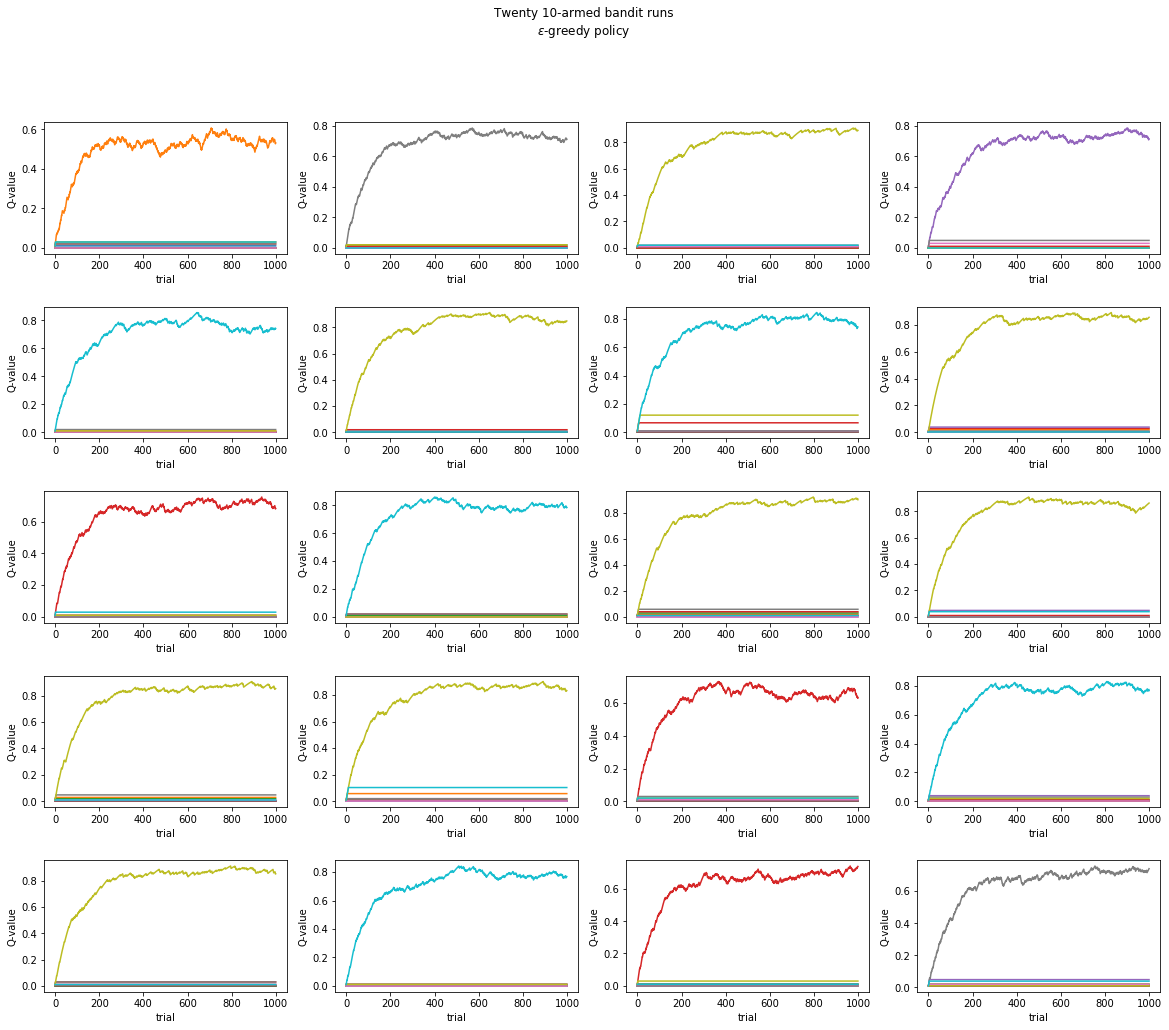

In [ ]:
fig, axs = plt.subplots(5,4,figsize=(20,16))
fig.subplots_adjust(wspace=.2,hspace=.4)
axs.ravel()
axs = axs.flatten()

fig.suptitle('Twenty 10-armed bandit runs\n$\epsilon$-greedy policy')

for i in range(reps):
  for j in range(ls):
    axs[i].plot(rep_Qs[i,j,:])
    axs[i].set_xlabel('trial')
    axs[i].set_ylabel('Q-value')

Yes! the agent identifies the lever with the largest Q-value in each repetition.

In [ ]:
# 1.6

reps = int(100)
all_eps = [0.0,.01,.1,.5]
tri = int(1e3)

eps_Qs = np.zeros((len(all_eps),reps,ls,tri))
eps_maxQs = np.zeros((len(all_eps),reps,tri))
eps_E_Qs = np.zeros((len(all_eps),reps,tri))

# running 4 different epsilons
for k, eps in enumerate(all_eps):
  rep_Qs = np.zeros((reps,ls,tri))

  # running 100 repetitions
  for g in range(reps):
    Q = np.zeros_like(p)[:,np.newaxis]
    trial_Qs = np.zeros((ls,tri))

    # running 1000 trials
    for j in range(tri):
      levs, g_chosen, g_maxQ = eps_greedy(Q,eps)
      eps_maxQs[k,g,j] = g_maxQ # largest Q-values
      eps_E_Qs[k,g,j] = np.sum(g_chosen).squeeze() # does expected reward involve g_chosen?

      for i,x in enumerate(levs):
        R = generate_reward(x,p)
        Q[x] += eta*(R-Q[x])

      trial_Qs[:,j] = np.squeeze(Q)
    
    rep_Qs[g] = trial_Qs
  
  eps_Qs[k] = rep_Qs

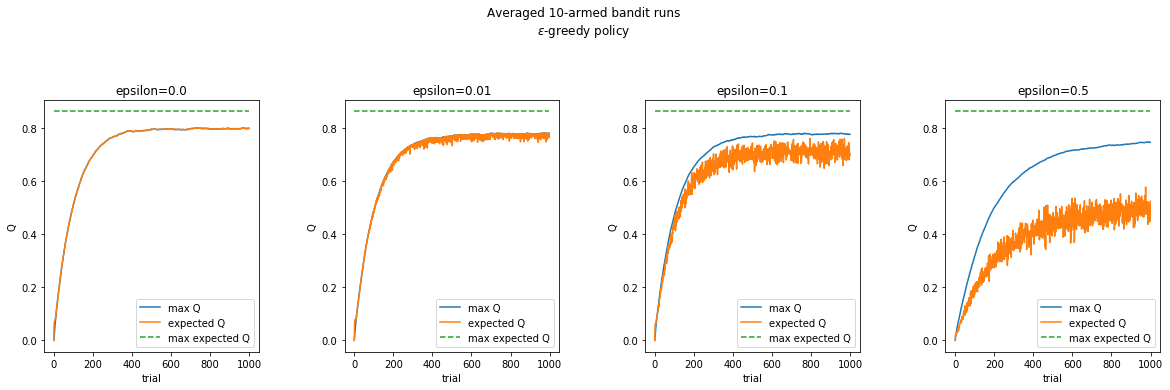

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(20,5))

fig.suptitle('Averaged 10-armed bandit runs\n$\epsilon$-greedy policy',)
fig.subplots_adjust(wspace=.4,top=.72, bottom = .02)
axs.ravel()
axs = axs.flatten()

for i in range(len(all_eps)):
  axs[i].plot(np.mean(eps_maxQs,axis=1,dtype=np.float64)[i], label='max Q')
  axs[i].plot(np.mean(eps_E_Qs,axis=1,dtype=np.float64)[i], label="expected Q")
  axs[i].plot(np.repeat(np.max(p),tri), linestyle='--',label='max expected Q')
  axs[i].set_xlabel('trial')
  axs[i].set_ylabel('Q')
  axs[i].legend()
  axs[i].set_title(f'epsilon={all_eps[i]}')


As epsilon grows, there's a higher likelihood of not choosing the lever with the highest Q-value, the model will take longer to converge, as will the average maximum Q-value seen across trials.

In [ ]:
# 1.7

def softmax(Q,beta):
  maxQ = np.max(Q)
  sm_p = np.zeros_like(Q).squeeze() # probability mass function
  denom = 0

  for i,x in enumerate(Q):
    sm_p[i] = np.exp(beta*x)
    denom += np.exp(beta*x)

  sm_p /= denom
  
  return np.random.choice(10,1,p=sm_p), maxQ

In [ ]:
reps = 100
tri = 5000
betas = [1,5,15,50]

beta_Qs = np.zeros((len(all_eps),reps,ls,tri))
beta_maxQs = np.zeros((len(all_eps),reps,tri))
beta_E_Qs = np.zeros((len(all_eps),reps,tri))

# running 4 different betas
for k, beta in enumerate(betas):
  rep_Qs = np.zeros((reps,ls,tri))

  # running 100 repetitions
  for g in range(reps):
    Q = np.zeros_like(p)[:,np.newaxis]
    trial_Qs = np.zeros((ls,tri))

    # running 5000 trials
    for j in range(tri):
      lev, s_maxQ = softmax(Q,beta)

      beta_maxQs[k,g,j] = s_maxQ  # largest Qs
      beta_E_Qs[k,g,j] = Q[lev] # chosen Q is expected reward

      R = generate_reward(lev,p)
      Q[x] += eta*(R-Q[x])

      trial_Qs[:,j] = np.squeeze(Q)
    
    rep_Qs[g] = trial_Qs
  
  beta_Qs[k] = rep_Qs

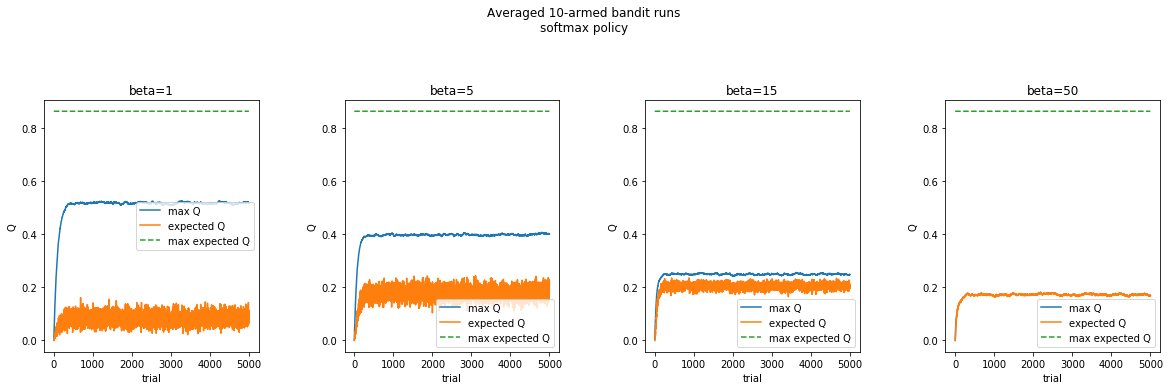

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(20,5))

fig.suptitle('Averaged 10-armed bandit runs\nsoftmax policy',)
fig.subplots_adjust(wspace=.4,top=.72, bottom = .02)
axs.ravel()
axs = axs.flatten()

for i in range(len(betas)):
  axs[i].plot(np.mean(beta_maxQs,axis=1,dtype=np.float64)[i], label='max Q')
  axs[i].plot(np.mean(beta_E_Qs,axis=1,dtype=np.float64)[i], label="expected Q")
  axs[i].plot(np.repeat(np.max(p),tri), linestyle='--',label='max expected Q')
  axs[i].set_xlabel('trial')
  axs[i].set_ylabel('Q')
  axs[i].legend()
  axs[i].set_title(f'beta={betas[i]}')

There are no improvements seen here over the epsilon-greedy policy. High beta leads to more exploitation. With low beta, there is higher probability to choose a number of different levers, with high beta, we tend to choose just one. It seems our model with beta = 50 has decided to expoit the lever with a prability of .2, only choosing that every time. High beta also drives down our maximum Q-value due to the scaling of the denomiator in the softmax calculation.

In [ ]:
# 1.8 

reps = 500
tri = 1000

eps = .1
beta = 15
params = [eps,beta]


r5k_Qs = np.zeros((len(params),reps,ls,tri))
r5k_maxQs = np.zeros((len(params),reps,tri)) # return 5k chocolates
r5k_E_Qs = np.zeros((len(params),reps,tri))


for k,y in enumerate(params):
  r5k_rep_Qs = np.zeros((reps,ls,tri))

  # running 500 repetitions
  for g in range(reps):
    Q = np.zeros_like(p)[:,np.newaxis]
    trial_Qs = np.zeros((ls,tri))

    # running 1000 trials
    for j in range(tri):
      if k == 0: # epsilon-greedy
        levs, g_chosen, g_maxQ = eps_greedy(Q,eps)
        r5k_maxQs[k,g,j] = g_maxQ  
        r5k_E_Qs[k,g,j] = np.sum(g_chosen).squeeze()

      else: # softmax
        levs, s_maxQ = softmax(Q,beta) # 'levs' a misnomer, just one lever choice
        r5k_maxQs[k,g,j] = s_maxQ  
        r5k_E_Qs[k,g,j] = Q[levs] 

      for i,x in enumerate(levs):
        if x == len(Q)-1:
          R = -5000
        else: 
          R = generate_reward(x,p)
        Q[x] += eta*(R-Q[x])

      trial_Qs[:,j] = np.squeeze(Q)
    
    r5k_rep_Qs[g] = trial_Qs
  
  r5k_Qs[k] = r5k_rep_Qs

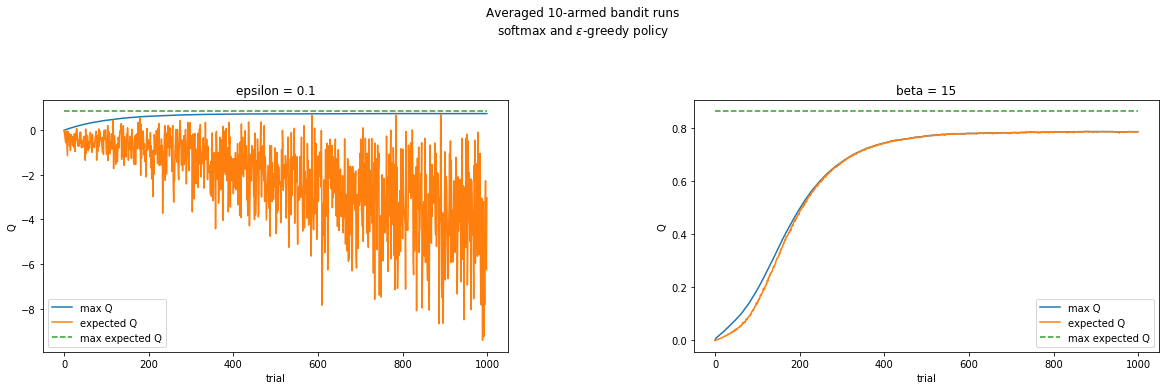

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(20,5))

fig.suptitle('Averaged 10-armed bandit runs\nsoftmax and $\epsilon$-greedy policy',)
fig.subplots_adjust(wspace=.4,top=.72, bottom = .02)
axs.ravel()
axs = axs.flatten()

for i in range(len(params)):
  axs[i].plot(np.mean(r5k_maxQs,axis=1,dtype=np.float64)[i], label='max Q')
  axs[i].plot(np.mean(r5k_E_Qs,axis=1,dtype=np.float64)[i], label="expected Q")
  axs[i].plot(np.repeat(np.max(p),tri), linestyle='--',label='max expected Q')
  axs[i].set_xlabel('trial')
  axs[i].set_ylabel('Q')
  axs[i].legend()


axs[0].set_title(f'epsilon = {eps}')
axs[1].set_title(f'beta = {beta}')

plt.show()

The softmax policy helps us avoid choosing the lever with a Q-value of -5000. However, due to our random choice with the epsilon-greedy policy, we find ourselves loosing more and more. Exploitation pays off well here.

In [ ]:
# 1.9

# bs = [.1,.4,1.6,6.4,25.6] # softmax values overflow to infinity using small b
bs = [6.4, 25.6]
reps = 100
tri = 2000

# modified softmax, beta linearly increasing
bi_Qs = np.zeros((len(bs),reps,ls,tri))
bi_maxQs = np.zeros((len(bs),reps,tri))
bi_E_Qs = np.zeros((len(bs),reps,tri))

# running 5 different modified betas
for k, b in enumerate(bs):
  bi_rep_Qs = np.zeros((reps,ls,tri))

  # running 100 repetitions
  for g in range(reps):
    Q = np.zeros_like(p)[:,np.newaxis]
    trial_Qs = np.zeros((ls,tri))
    beta_i = np.zeros((tri)) # array for modified betas

    # running 5000 trials
    for j in range(tri):
      beta_i[j] = 1 + j/b 
      # print(j)
      lev, s_maxQ = softmax(Q,beta_i[j])

      bi_maxQs[k,g,j] = s_maxQ  # largest Qs
      bi_E_Qs[k,g,j] = Q[lev] # chosen Q is expected reward

      R = generate_reward(lev,p)
      Q[x] += eta*(R-Q[x])

      trial_Qs[:,j] = np.squeeze(Q)
    
    bi_rep_Qs[g] = trial_Qs
  
  bi_Qs[k] = bi_rep_Qs

Note: Softmax values overflow to infinity using small b, due to the exponential term in our probabiliy calculation.

In [ ]:
# Example: probability denomiator term after 120 trials, Q = .72 and t b = .01
np.exp(1201*.72)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

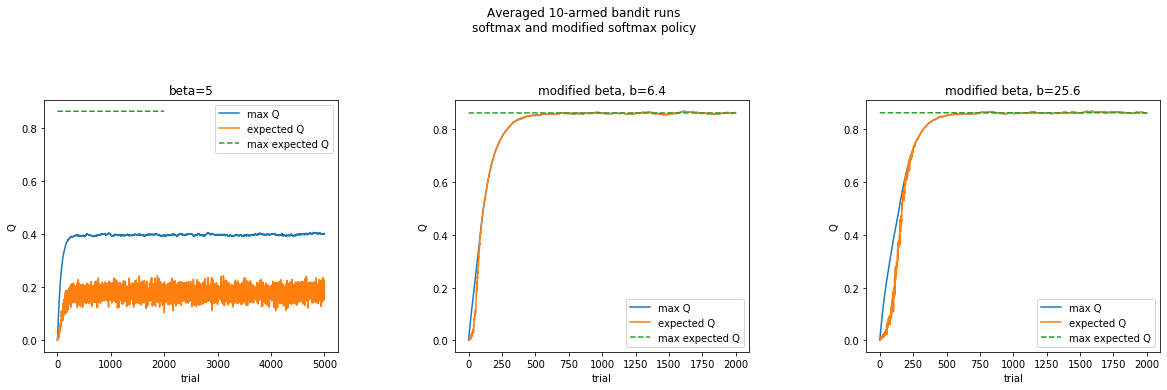

In [ ]:
fig, axs = plt.subplots(1,len(bs)+1,figsize=(20,5))

fig.suptitle('Averaged 10-armed bandit runs\nsoftmax and modified softmax policy',)
fig.subplots_adjust(wspace=.4,top=.72, bottom = .02)
axs.ravel()
axs = axs.flatten()

# plotting normal softmax, beta = 5
axs[0].plot(np.mean(beta_maxQs,axis=1,dtype=np.float64)[1], label='max Q')
axs[0].plot(np.mean(beta_E_Qs,axis=1,dtype=np.float64)[1], label="expected Q")
axs[0].plot(np.repeat(np.max(p),tri), linestyle='--',label='max expected Q')
axs[0].set_xlabel('trial')
axs[0].set_ylabel('Q')
axs[0].legend()
axs[0].set_title(f'beta={betas[1]}')

# plotting modified softmax
for i in range(len(bs)):
  axs[i+1].plot(np.mean(bi_maxQs,axis=1,dtype=np.float64)[i], label='max Q')
  axs[i+1].plot(np.mean(bi_E_Qs,axis=1,dtype=np.float64)[i], label="expected Q")
  axs[i+1].plot(np.repeat(np.max(p),tri), linestyle='--',label='max expected Q')
  axs[i+1].set_xlabel('trial')
  axs[i+1].set_ylabel('Q')
  axs[i+1].legend()
  axs[i+1].set_title(f'modified beta, b={bs[i]}')

I observe the modified beta policy really drives us to take the lever with the largest Q-value the smaller the $b$ is (and therefore the larger the iterative increase in beta). Total exploitation.

Total cumulative sum for beta-slope = 6.4: 1612.5387973327074
Total cumulative sum for beta-slope = 25.6: 1574.6727438028195


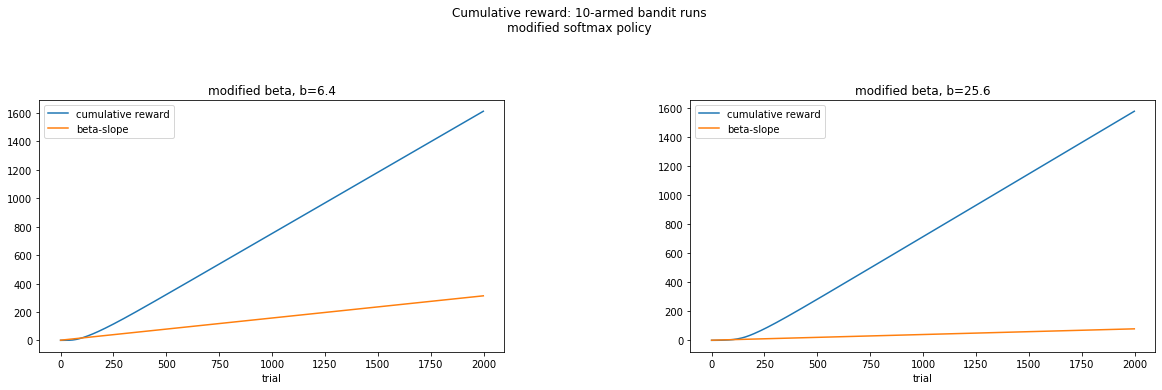

In [ ]:
fig, axs = plt.subplots(1,len(bs),figsize=(20,5))

fig.suptitle('Cumulative reward: 10-armed bandit runs\nmodified softmax policy',)
fig.subplots_adjust(wspace=.4,top=.72, bottom = .02)
axs.ravel()
axs = axs.flatten()

bs_i = np.zeros((len(bs),tri)) # beta slopes over trial
for i,x in enumerate(bs):
 bs_i[i] = 1 + np.arange(tri)/x

# plotting modified softmax
for i in range(len(bs)):
  axs[i].plot(np.cumsum(np.mean(bi_E_Qs,axis=1,dtype=np.float64)[i]), label="cumulative reward")
  axs[i].plot(bs_i[i], label="beta-slope")
  axs[i].set_xlabel('trial')
  axs[i].legend()
  axs[i].set_title(f'modified beta, b={bs[i]}')
  print(f'Total cumulative sum for beta-slope = {bs[i]}: {np.cumsum(np.mean(bi_E_Qs,axis=1,dtype=np.float64)[i])[-1]}')

The smaller the beta-slope, the larger the cumulative sum. Smaller beta-slopes exploit the largest Q-valued lever more, so of course they will have a larger cumulative reward. With varying beta, we allow for some exploration earlier on in learning, before exploiting what is already know about the environment. For a modification to the epsilon-greedy policy, one might choose a linearly decaying-to-0 epsilon.